In [38]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy


data = pd.read_csv('gapminder.csv')
dataFrame = pd.DataFrame(data=data)
dataFrame = dataFrame.drop('Region', axis = 1)

In [19]:
print(dataFrame)

     population  fertility   HIV        CO2  BMI_male    GDP  BMI_female  \
0      34811059       2.73   0.1   3.328945  24.59620  12314    129.9049   
1      19842251       6.43   2.0   1.474353  22.25083   7103    130.1247   
2      40381860       2.24   0.5   4.785170  27.50170  14646    118.8915   
3       2975029       1.40   0.1   1.804106  25.35542   7383    132.8108   
4      21370348       1.96   0.1  18.016313  27.56373  41312    117.3755   
..          ...        ...   ...        ...       ...    ...         ...   
134     3350832       2.11   0.5   2.489764  26.39123  15317    124.2604   
135    26952719       2.46   0.1   4.476669  25.32054   3733    124.3462   
136    86589342       1.86   0.4   1.479347  20.91630   4085    121.9367   
137    13114579       5.88  13.6   0.148982  20.68321   3039    132.4493   
138    13495462       3.85  15.1   0.654323  22.02660   1286    131.9745   

     life  child_mortality  
0    75.3             29.5  
1    58.3            192.0  


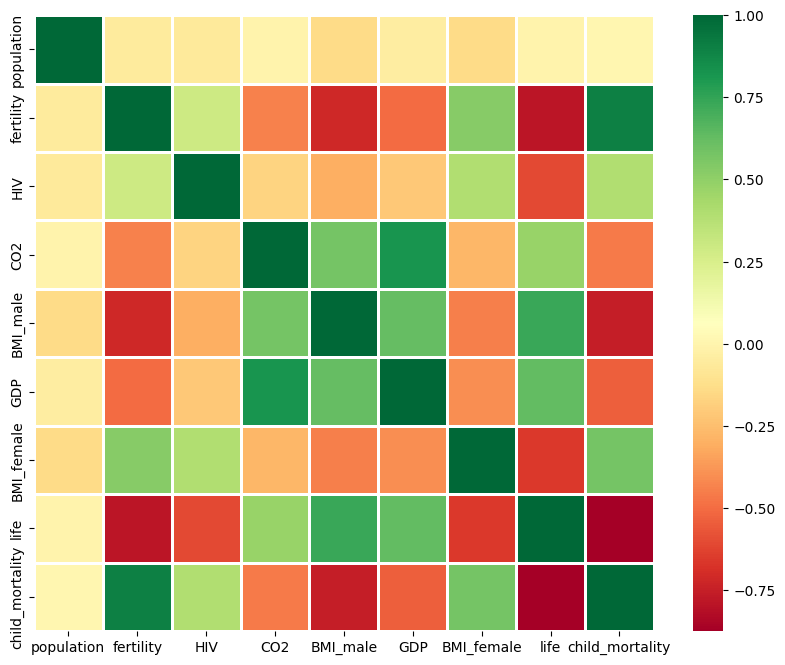

In [42]:

plt.figure(figsize=(10,8))
heatmap = sns.heatmap(dataFrame.corr(), linewidth=1, cmap="RdYlGn")
plt.show()

-4.443878989782839 82.9572136174258


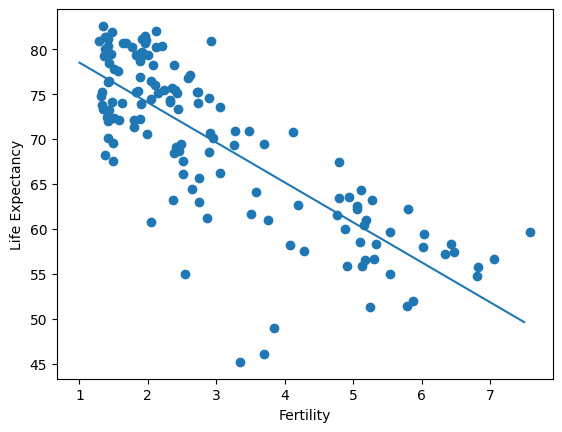

0.6192442167740035


C:\Users\Admin\AppData\Local\Temp\ipykernel_25852\1104185362.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
C:\Users\Admin\AppData\Local\Temp\ipykernel_25852\1104185362.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:, None], y))


In [26]:
x = dataFrame['fertility']
y = dataFrame['life']

m,b = np.polyfit(x,y,1)
print(m, b)
bestX = np.linspace(1,7.5,2)

plt.scatter(x,y)
plt.plot(bestX, m*bestX + b)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))

In [28]:
x = dataFrame[['fertility','HIV','CO2','BMI_male','GDP','BMI_female','child_mortality']]
y = dataFrame['life']


regression = LinearRegression()
regression.fit(x, y)
print(regression.score(x, y))

cross_val_score(regression, x, y, cv=5)

0.8974995317332959


array([0.81621881, 0.8322471 , 0.90868335, 0.81325568, 0.94404223])

In [31]:
creditData = pd.read_csv('creditcard.csv')
print(creditData.shape)

(284807, 31)


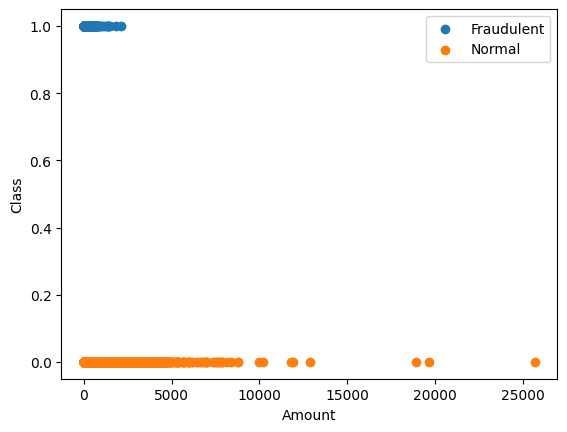

In [47]:
frauds = creditData.loc[creditData['Class'] == 1]
nonFrauds = creditData.loc[creditData['Class'] == 0]

plt.scatter(frauds['Amount'], frauds['Class'], label='Fraudulent')
plt.scatter(nonFrauds['Amount'], nonFrauds['Class'], label = 'Normal')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()
plt.show()


C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

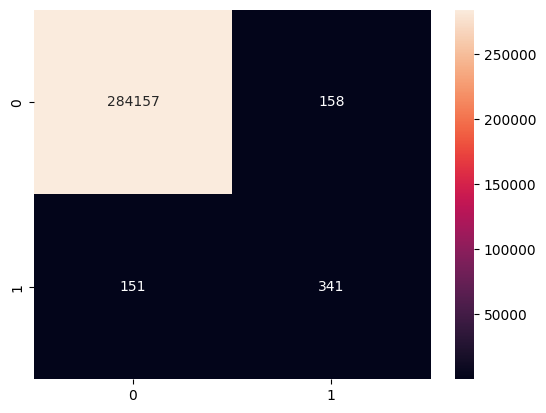

In [43]:
x = creditData.drop("Class", axis = 1)
y = creditData['Class']

logisticRegression = LogisticRegression().fit(x,y)
yPred = logisticRegression.predict(x)
confusionMatrix = confusion_matrix(y,yPred)

sns.heatmap(confusionMatrix, annot=True, fmt='g')